In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

### Data cleaning

In [3]:
#Upload games dataframe
df = pd.read_csv('Games_data_frame.csv')

In [4]:
df.head()

,name,platform,release_date,summary,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,23-Nov-98,"As a young boy, Link is tricked by Ganondorf, ...",9.1
1,Tony Hawk's Pro Skater 2,PlayStation,20-Sep-00,As most major publishers' development efforts ...,7.4
2,Grand Theft Auto IV,PlayStation 3,29-Apr-08,[Metacritic's 2008 PS3 Game of the Year; Also ...,7.7
3,SoulCalibur,Dreamcast,8-Sep-99,"This is a tale of souls and swords, transcendi...",8.4
4,Grand Theft Auto IV,Xbox 360,29-Apr-08,[Metacritic's 2008 Xbox 360 Game of the Year; ...,7.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   user_review   18800 non-null  object
dtypes: object(5)
memory usage: 734.5+ KB


In [6]:
#Change the Dtype for release_date and user_review
df['release_date'] = pd.to_datetime(df['release_date'])
df['user_review'] = pd.to_numeric(df['user_review'], errors='coerce') #dealing with text values

/tmp/ipykernel_1125/1218413074.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


In [7]:
#Check for duplicates, remove them
print(df.shape[0])
df = df.drop_duplicates().reset_index(drop=True)
print(df.shape[0])

18800
18799


### EDA

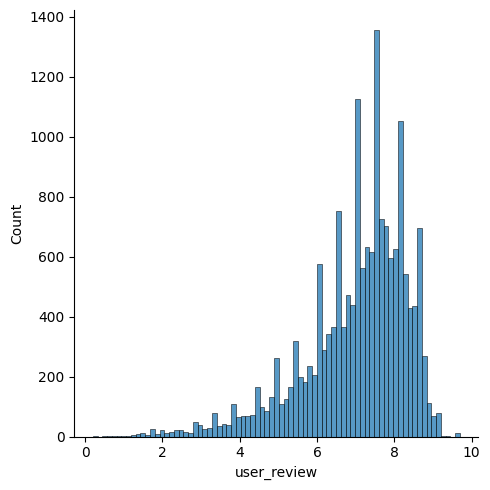

In [8]:
#Histogramm
sns_plot = sns.displot(df['user_review'])

We observe a left-skewed distribution of user review scores. This skewness suggests that higher review scores are more frequent, possibly indicating a tendency among users to leave positive reviews. Alternatively, it might mean that dissatisfied users are less inclined to provide feedback.

Given the left-skewed nature of the distribution, the median value may offer a more representative measure of central tendency than the mean, as it is less affected by extreme values on the lower end of the scale.

In [9]:
#Let's look at the statistic
df['user_review'].describe()

count    17435.000000
mean         6.990846
std          1.351554
min          0.200000
25%          6.300000
50%          7.300000
75%          7.900000
max          9.700000
Name: user_review, dtype: float64

In [10]:
#Let's look at the the data across platforms:
platform_reviews_description = df.groupby('platform')['user_review'].describe().sort_values(
    by='count', ascending=False)
platform_reviews_description

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PC,4660.0,6.918197,1.315235,0.6,6.300,7.20,7.8,9.6
PlayStation 4,1950.0,6.492256,1.367840,0.2,5.900,6.80,7.4,9.6
Xbox 360,1547.0,6.915643,1.319571,1.3,6.200,7.20,7.9,9.7
PlayStation 2,1311.0,7.532494,1.315438,1.8,7.000,7.90,8.5,9.7
Switch,1216.0,7.171053,1.212195,1.0,6.700,7.50,8.0,9.6
PlayStation 3,1208.0,6.924669,1.314045,1.8,6.300,7.20,7.9,9.7
Xbox One,1089.0,6.473186,1.355557,0.5,5.700,6.80,7.4,9.6
Xbox,686.0,7.156997,1.420672,0.7,6.700,7.50,8.1,9.1
DS,599.0,7.126878,1.288265,1.1,6.500,7.40,8.0,9.7


The median user review scores are fairly uniform across different gaming platforms, ranging from 6.80 to 8.25. This indicates that there isn't a significant disparity in user satisfaction across platforms. Each platform seems to perform relatively similarly in terms of user reviews, suggesting a competitive market without a clear leader in terms of user approval.

Next, let's group the data by year to see the dynamics through time. 

In [11]:
#Add year as a separate column
df['release_year'] = df['release_date'].dt.year
df.head(1)

,name,platform,release_date,summary,user_review,release_year
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998-11-23,"As a young boy, Link is tricked by Ganondorf, ...",9.1,1998


In [12]:
release_year_description = df.groupby('release_year')['user_review'].describe().sort_values(
    by='release_year', ascending=False)
release_year_description

,count,mean,std,min,25%,50%,75%,max
release_year,,,,,,,,
2021,562.0,6.773488,1.454451,0.5,6.000,7.10,7.800,9.2
2020,957.0,6.618391,1.544025,0.2,5.900,7.00,7.700,9.6
2019,974.0,6.533778,1.502680,0.7,5.625,6.90,7.700,9.6
2018,1091.0,6.714299,1.401283,1.4,6.100,7.00,7.700,9.2
2017,994.0,6.745473,1.298959,1.4,6.200,7.00,7.600,9.0
2016,944.0,6.708686,1.230562,1.4,6.100,7.00,7.600,9.6
2015,840.0,6.823333,1.241804,1.5,6.200,7.10,7.700,9.4
2014,764.0,6.847382,1.277266,1.5,6.200,7.10,7.700,9.7
2013,756.0,6.798810,1.374676,1.3,6.100,7.10,7.700,9.2


I already see the interesting dynamic here: the median user_review score steadily decreases over time. Let's visualize it and explore it further. 

In [13]:
#transform to dataframe
release_year_description = pd.DataFrame(data=release_year_description.to_records())
#Drop 1995 year because it only has one observation, which is not very relevant. 
release_year_description = release_year_description[release_year_description['release_year'] != 1995]

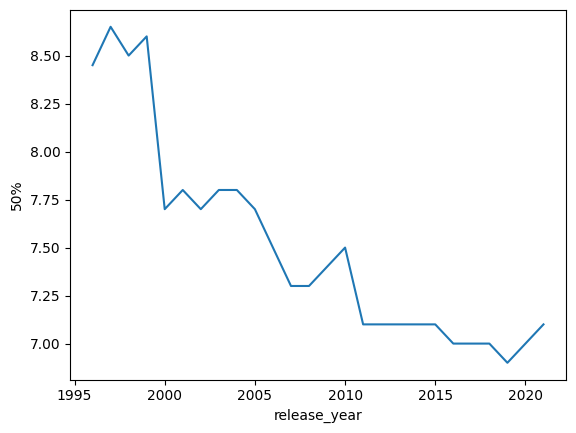

In [14]:
sns.lineplot(data=release_year_description, x="release_year", y="50%");

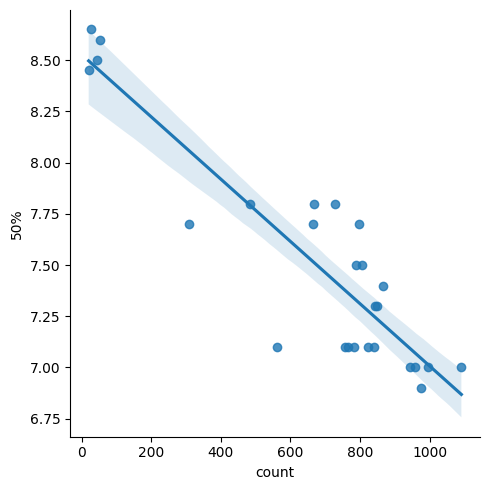

In [15]:
#Let's check the correlation between the count of games released during the year and the median user_review score.
sns.lmplot(data=release_year_description, x='count', y='50%');

In [16]:
correlation = release_year_description['count'].corr(
    release_year_description['50%'])
print(correlation)

-0.902726309735935


What I'm going to explore next - is how the median user_review score changed over time across the platforms. But there are too many platforms to deal with them separately, so I'll decrease the granularity by combining them into the following four groups: Play Station, Xbox, PC, and Other platforms.  

In [87]:
def map_platform_to_category(platform):
    if 'PlayStation' in platform:
        return 'PlayStation'
    elif 'Xbox' in platform:
        return 'Xbox'
    elif 'pc' in platform.lower() or bool(re.search(r'\bpc\b', platform, re.IGNORECASE)):
        return 'PC'
    else:
        return 'Other platforms'
    
df['platform_grouped'] = df['platform'].apply(map_platform_to_category)
df['platform_grouped'].value_counts()

platform_grouped
PlayStation        5294
Other platforms    4953
PC                 4863
Xbox               3689
Name: count, dtype: int64

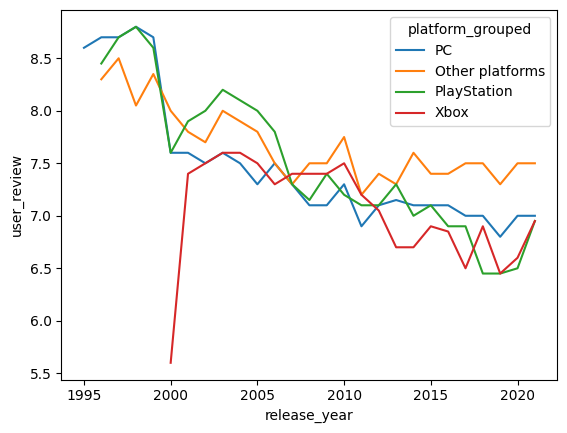

In [59]:
#check the dynamic by grouped platforms by years
platforms_gr_by_years = df.groupby(['release_year', 'platform_grouped'], as_index = False).agg(
    {'user_review':'median', 'name':'count'})
platforms_gr_by_years = platforms_gr_by_years.rename(columns={'name':'count_of_games_realesed'})
sns.lineplot(data=platforms_gr_by_years, x="release_year", y="user_review", hue="platform_grouped");

In [82]:
#The 2000 years for Xbox seems like an outlier. I'll remove it
print(platforms_gr_by_years.loc[(platforms_gr_by_years['platform_grouped'] == 'Xbox') & 
                                (platforms_gr_by_years['release_year'] == 2000)])


platforms_gr_by_years = platforms_gr_by_years.loc[~((platforms_gr_by_years['platform_grouped'] == 'Xbox') & 
                                                    (platforms_gr_by_years['release_year'] == 2000))]

    release_year platform_grouped  user_review  count_of_games_realesed
16          2000             Xbox          5.6                       11


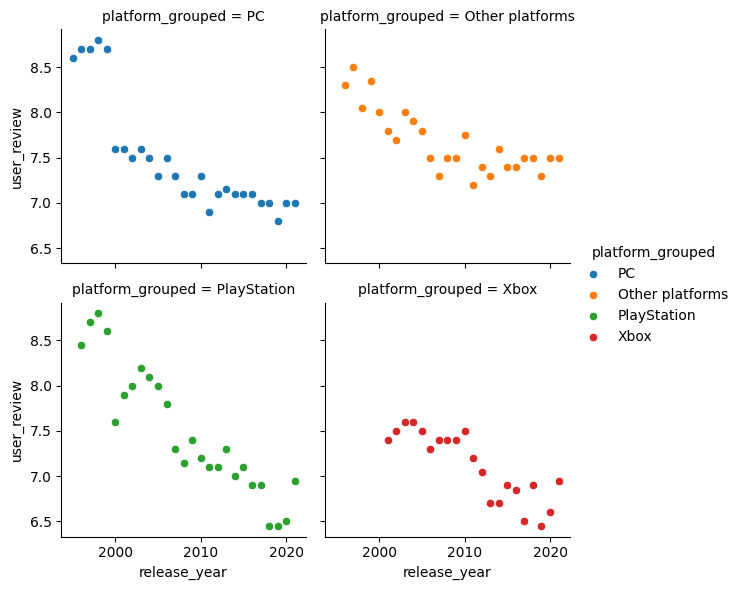

In [83]:
grid = sns.FacetGrid(platforms_gr_by_years, col="platform_grouped", hue="platform_grouped", col_wrap=2)
grid.map(sns.scatterplot, "release_year", "user_review")
grid.add_legend();

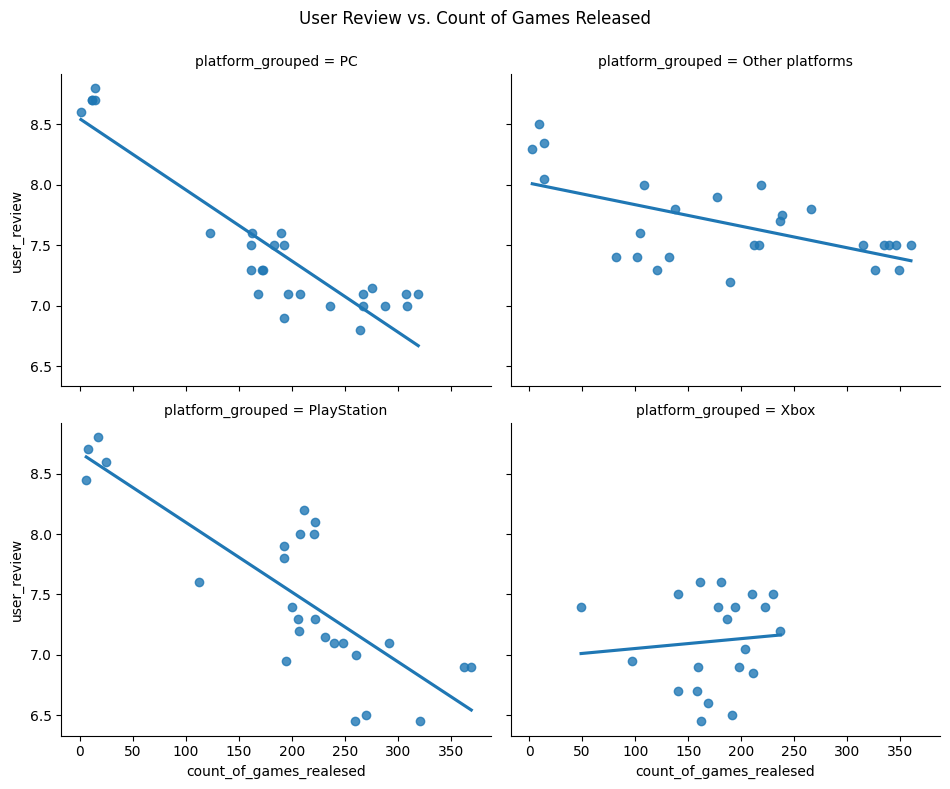

In [85]:
import matplotlib.pyplot as plt

# Create an lmplot with regression lines
sns.lmplot(x='count_of_games_realesed', y='user_review', col='platform_grouped',
           data=platforms_gr_by_years, aspect=1.2, height=4, col_wrap=2, fit_reg=True, ci=None)

# Set the plot title and adjust the spacing
plt.subplots_adjust(top=0.9)
plt.suptitle('User Review vs. Count of Games Released')

# Show the plot
plt.show()

### Conclusion

Across all gaming platforms, there appears to be a consistent downward trend in user review scores over time. This trend is observed in conjunction with the correlation between the volume of game releases and user review scores, which holds true for all platform categories with the exception of Xbox. One plausible interpretation of this pattern is that a surge in game production may lead to market saturation with lower-quality offerings, thereby diminishing the perceived 'average' quality and, consequently, user review scores. Another potential explanation is that an increase in the number of available games intensifies market competition, subsequently elevating user expectations. As a result, consumers may become more critical, assigning lower ratings to products that are deemed merely satisfactory.

The final visualization prepared in Tableau: 
https://public.tableau.com/views/VideoGamesMarketDensity/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link